In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

# Overall References

- [plot doc](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)
- [matplotlib tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)

# Bar Chart

## References

1. [Simple bar charts](https://fcpython.com/visualisation/simple-bar-charts-in-matplotlib)
1. [histogram, visualize distribution](https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/)

In [4]:
table = pd.read_csv("issues.sev.csv", header=1)
print(table.head())
print(type(table))
table.head()

                      date  group_name impact    case_id   sev  nTicketBySev
0  2018-01-04 00:35:42 UTC     group-a      3  135338635  Sev2         156.0
1  2018-01-05 16:35:43 UTC     group-a      3  136492446  Sev3         939.0
2  2018-01-06 02:12:15 UTC     group-a      3  136535970  Sev4         107.0
3  2018-01-06 13:05:46 UTC     group-a      3  136570509  Sev5         143.0
4  2018-01-07 12:20:49 UTC     group-a      3  136620073   NaN           NaN
<class 'pandas.core.frame.DataFrame'>


,date,group_name,impact,case_id,sev,nTicketBySev
0,2018-01-04 00:35:42 UTC,group-a,3,135338635,Sev2,156.0
1,2018-01-05 16:35:43 UTC,group-a,3,136492446,Sev3,939.0
2,2018-01-06 02:12:15 UTC,group-a,3,136535970,Sev4,107.0
3,2018-01-06 13:05:46 UTC,group-a,3,136570509,Sev5,143.0
4,2018-01-07 12:20:49 UTC,group-a,3,136620073,NaN,NaN


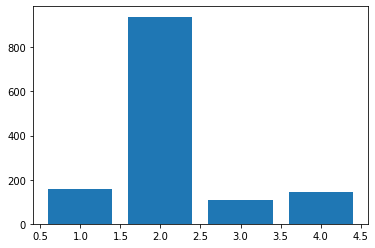

In [5]:
plt.bar(x=np.arange(1,5),height=table['nTicketBySev'][:4])
plt.show()

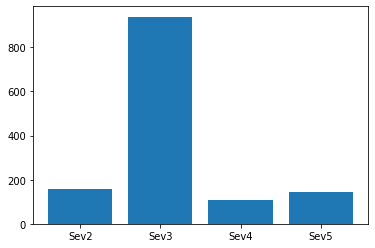

In [6]:
plt.bar(x=table['sev'][:4],height=table['nTicketBySev'][:4])
plt.show()

143.0    1
107.0    1
939.0    1
156.0    1
Name: nTicketBySev, dtype: int64


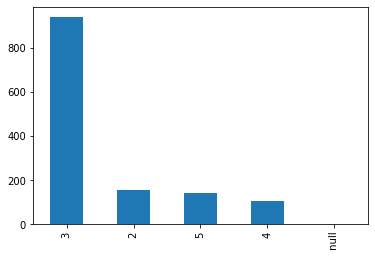

In [7]:
print(table.nTicketBySev.value_counts())
table.impact.value_counts().plot(kind='bar')

# Line Plot

- [matplotlib Line2d Doc](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)

Text(0, 0.5, 'some numbers')

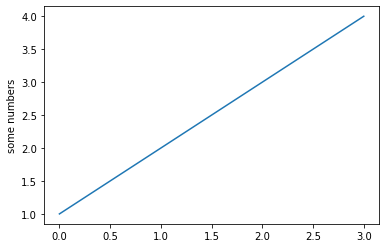

In [8]:
plt.plot([1, 2, 3, 4]) # x [0,1,2,3]
plt.ylabel('some numbers')
#plt.show()

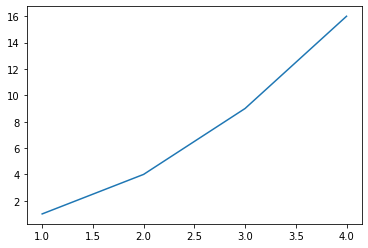

In [9]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])


[0, 6, 0, 20]

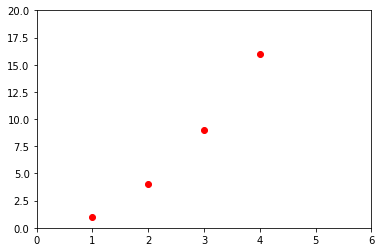

In [10]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro') # default b-: blue line, ro: red circle
plt.axis([0, 6, 0, 20]) # x min max, y min max


array: [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]


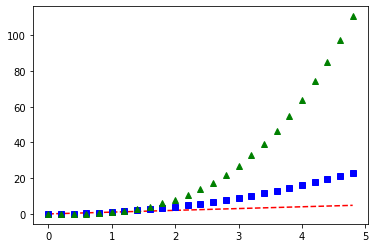

In [11]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2) # numpy array
print("array:", t)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

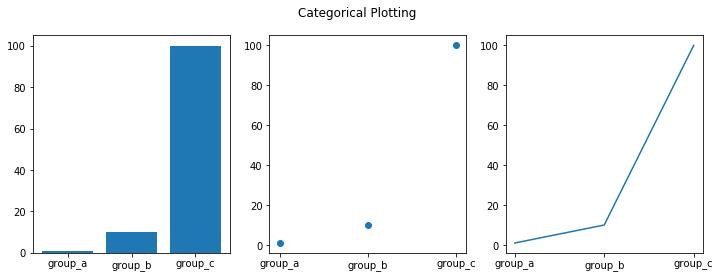

In [12]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## line plot styles

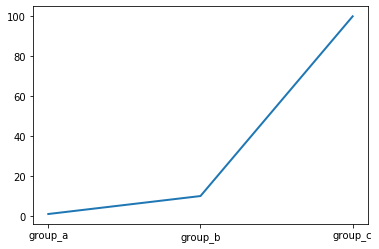

In [13]:
plt.plot(names, values, linewidth=2.0)

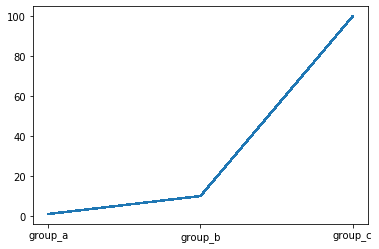

In [28]:
line, = plt.plot(names, values, '-')
line.set_antialiased(False) # turn off antialiasing

[None, None, None, None]

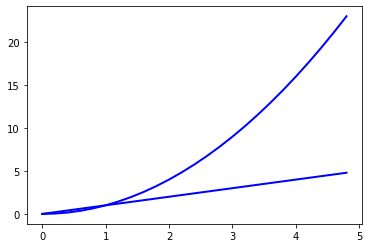

In [35]:
lines = plt.plot(t, t, t, t**2)
# use keyword args
plt.setp(lines, color='r', linewidth=2.0) # red
# or MATLAB style string value pairs
plt.setp(lines, 'color', 'b', 'linewidth', 2.0) # blue

[None, None, None, None]

# Scatter Plot

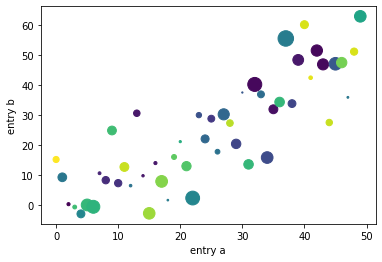

In [30]:
# Plotting with keyword strings
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data) # c:color s: marker size
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## Scatter plot log scale

In [18]:
data = { 
        "Pete's":           600000,
        "Clock":           1600000,
        "Buckey's BBQ":    2600000,
        "Pepsi":        6466000000,
        "Intel" :      70848000000,
        "Alphabet":    136819000000,
        "Amazon":      232887000000
        }
        
df = pd.DataFrame.from_dict(data,orient='index',columns=['Revenue'])
df.head()

,Revenue
Pete's,600000
Clock,1600000
Buckey's BBQ,2600000
Pepsi,6466000000
Intel,70848000000


In [19]:
type(df['Revenue'][0])

numpy.int64

In [20]:
dg = pd.to_numeric(df['Revenue'])
type(dg[0])

numpy.int64

In [23]:
dc = pd.Series(dg.index.values.tolist()).to_frame('Company')
print(type(dc))
dc.head()

<class 'pandas.core.frame.DataFrame'>


,Company
0,Pete's
1,Clock
2,Buckey's BBQ
3,Pepsi
4,Intel


In [24]:
dat = df.assign(Company=dc.values)
print(type(dat))
dat.head()

<class 'pandas.core.frame.DataFrame'>


,Revenue,Company
Pete's,600000,Pete's
Clock,1600000,Clock
Buckey's BBQ,2600000,Buckey's BBQ
Pepsi,6466000000,Pepsi
Intel,70848000000,Intel


In [25]:
data = dat.sort_values(by=['Revenue'])
data.head()

,Revenue,Company
Pete's,600000,Pete's
Clock,1600000,Clock
Buckey's BBQ,2600000,Buckey's BBQ
Pepsi,6466000000,Pepsi
Intel,70848000000,Intel


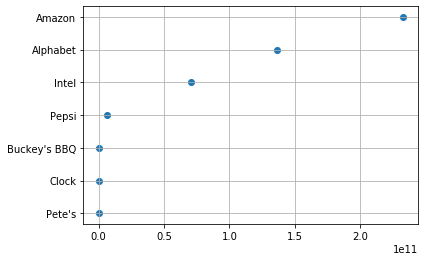

In [26]:
plt.scatter(data['Revenue'],data['Company'])
plt.grid()
plt.show()

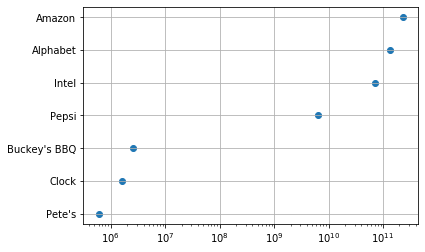

In [27]:
plt.scatter(data['Revenue'],data['Company'])
plt.grid()
plt.xscale("log")
plt.show()

# Hisogram

In [5]:
# load from seaborn github
tips_data = sns.load_dataset("tips")
print(type(tips_data))
tips_data.head()

<class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


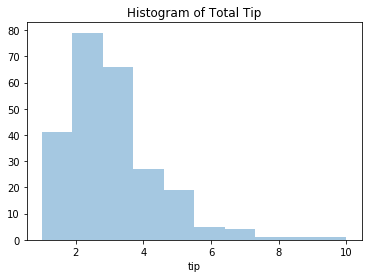

In [3]:
# with seaborn
sns.distplot(tips_data["tip"], kde = False, bins=10).set_title("Histogram of Total Tip")
plt.show()

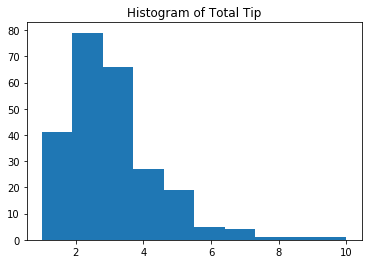

In [6]:
# with matplotlib
plt.hist(tips_data['tip'], bins=10)
plt.title("Histogram of Total Tip")
plt.show()

# Boxplot

- middle bar is median
- median of left half is Q1 quantile 1
- median of right half is Q3 quantile 3
- IQR (inter-quantile range) is Q3-Q1
- outliers: $< Q1 - 1.5\cdot IQR$ or $> Q3 + 1.5\cdot IQR$

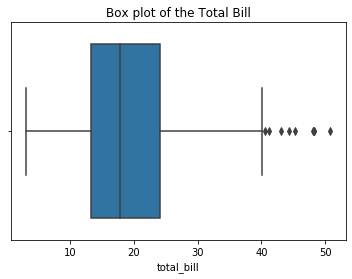

In [8]:
# with seaborn
sns.boxplot(tips_data["total_bill"]).set_title("Box plot of the Total Bill")
plt.show()

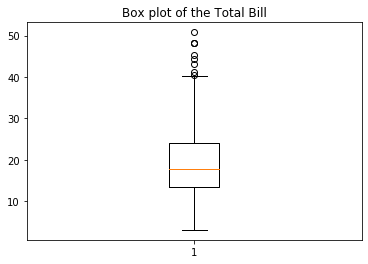

In [9]:
# with matplotlib
plt.boxplot(tips_data["total_bill"])
plt.title("Box plot of the Total Bill")
plt.show()

# Heat Map

type of y <class 'numpy.ndarray'>
type of slice slice(1, 5.05, 0.05)


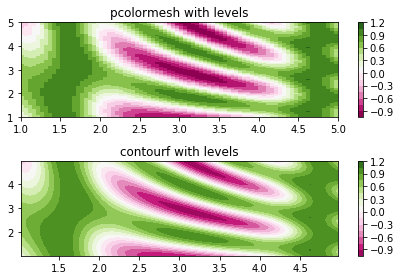

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

print('type of y', type(y))
print('type of slice', slice(1, 5 + dy, dy))

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

# Path

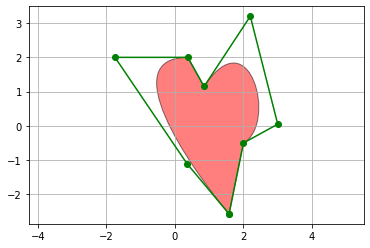

In [4]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()